In [1]:
#I'm looking at the Public Parks and Recreation data set from my first assignment but now narrowing down on parks in the Logan Neighborhood. Additionally, I'm redoing my plots with a basemap as I didn't understand how to create one in the previous assignment.

In [68]:
# importing libraries
import pandas as pd
import geopandas as gpd

#importing libraries that consists of basemaps
import matplotlib.pyplot as plt
import contextily as ctx

In [3]:
PPR = gpd.read_file('PPR_Properties.geojson')

In [4]:
# seeing what is in my data set 
PPR.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   OBJECTID                 510 non-null    int64   
 1   PUBLIC_NAME              510 non-null    object  
 2   PARENT_NAME              510 non-null    object  
 3   NESTED                   510 non-null    object  
 4   OFFICIAL_NAME            284 non-null    object  
 5   LABEL                    510 non-null    object  
 6   ALIAS                    353 non-null    object  
 7   DPP_ASSET_ID             510 non-null    int64   
 8   ADDRESS_911              502 non-null    object  
 9   ZIP_CODE                 510 non-null    object  
 10  ADDRESS_BRT              455 non-null    object  
 11  ALIAS_ADDRESS            426 non-null    object  
 12  ACREAGE                  510 non-null    float64 
 13  PROPERTY_CLASSIFICATION  510 non-null    object  
 14  PP

In [5]:
PPR.head()

OBJECTID                                     PUBLIC_NAME  \
0         1  William H (Billy) Markward Memorial Playground   
1         2                                Schuylkill Banks   
2         3                           Schuylkill River Park   
3         4                           Frankford Boat Launch   
4         5                            Orthodox Street Park   

             PARENT_NAME NESTED  \
0  Schuylkill River Park      Y   
1       Schuylkill Banks      N   
2  Schuylkill River Park      N   
3  Frankford Boat Launch      N   
4   Orthodox Street Park      N   

                                     OFFICIAL_NAME                  LABEL  \
0  William H. (Billy) Markward Memorial Playground               Markward   
1                                             None       Schuylkill Banks   
2                                             None  Schuylkill River Park   
3                            Frankford Boat Launch       Frankford Launch   
4                                             None               Orthodox   

                                               ALIAS  DPP_ASSET_ID  \
0                                               None          1903   
1                              Schuylkill River Park          2794   
2                                               None          2992   
3       PA Fish & Boat;Frankford Arsenal Boat Launch          3090   
4  Orthodox Street Parcel; Bridesburg Riverfront ...          3091   

        ADDRESS_911 ZIP_CODE  ... PPR_OPS_DISTRICT COUNCIL_DISTRICT  \
0    400 S TANEY ST    19146  ...             5, 7                2   
1    400 S TANEY ST    19103  ...             5, 7             2, 5   
2    400 S TANEY ST    19146  ...             5, 7                2   
3    5625 TACONY ST    19137  ...                2                6   
4  3101 ORTHODOX ST    19137  ...                2                6   

   POLICE_DISTRICT CITY_SCALE_MAPS LOCAL_SCALE_MAPS PROGRAM_SITES  \
0                9               Y                Y             Y   
1            9, 17               Y                Y             N   
2                9               Y                Y             Y   
3               15               Y                Y             N   
4               15               N                N             N   

                                            COMMENTS    Shape__Area  \
0                                               None   23295.664062   
1    Bill 160113 (4/14/16) -South of South St Bridge  101477.171875   
2                                               None   27216.929688   
3                                               None   78515.335938   
4  Officially acquired from PAID in 10/2019. Doc ...   72926.187500   

  Shape__Length                                           geometry  
0    892.868012  POLYGON ((-75.18383 39.94816, -75.18370 39.948...  
1   9300.670275  POLYGON ((-75.18103 39.96361, -75.18075 39.963...  
2    799.048584  POLYGON ((-75.18314 39.94821, -75.18307 39.948...  
3   1585.376114  POLYGON ((-75.05596 40.00750, -75.05601 40.007...  
4   1304.901416  POLYGON ((-75.06707 39.99007, -75.06713 39.990...  

[5 rows x 26 columns]

In [6]:
#reviewing data with only desired columns
PPR[['PUBLIC_NAME', 'ZIP_CODE', 'ACREAGE', 'COUNCIL_DISTRICT', 'Shape__Area', 'Shape__Length', 'geometry']]

PUBLIC_NAME ZIP_CODE    ACREAGE  \
0    William H (Billy) Markward Memorial Playground    19146   3.379144   
1                                  Schuylkill Banks    19103  14.717255   
2                             Schuylkill River Park    19146   3.947826   
3                             Frankford Boat Launch    19137  11.369730   
4                              Orthodox Street Park    19137  10.567337   
..                                              ...      ...        ...   
505        Officer Robert Hayes Memorial Playground    19115  20.173298   
506                       Benjamin Franklin Parkway        0  14.944706   
507                          Winter Street Greenway        0   0.781292   
508                       61st and Cobbs Creek Park    19143   5.163878   
509                       Lawrence Court Breezeways    19106   0.282288   

    COUNCIL_DISTRICT    Shape__Area  Shape__Length  \
0                  2   23295.664062     892.868012   
1               2, 5  101477.171875    9300.670275   
2                  2   27216.929688     799.048584   
3                  6   78515.335938    1585.376114   
4                  6   72926.187500    1304.901416   
..               ...            ...            ...   
505               10  139660.027344    1698.902277   
506                5  103066.453125    9195.466911   
507                5    5386.812500     679.857371   
508                3   35596.937500    1037.395645   
509                1    1945.863281     394.259401   

                                              geometry  
0    POLYGON ((-75.18383 39.94816, -75.18370 39.948...  
1    POLYGON ((-75.18103 39.96361, -75.18075 39.963...  
2    POLYGON ((-75.18314 39.94821, -75.18307 39.948...  
3    POLYGON ((-75.05596 40.00750, -75.05601 40.007...  
4    POLYGON ((-75.06707 39.99007, -75.06713 39.990...  
..                                                 ...  
505  POLYGON ((-75.02110 40.08925, -75.02113 40.089...  
506  MULTIPOLYGON (((-75.16788 39.95576, -75.16790 ...  
507  MULTIPOLYGON (((-75.17521 39.95933, -75.17410 ...  
508  POLYGON ((-75.24796 39.94538, -75.24809 39.945...  
509  MULTIPOLYGON (((-75.14944 39.94398, -75.14942 ...  

[510 rows x 7 columns]

In [7]:
#creating new variable with desired columns
desired_columns = ['PUBLIC_NAME', 'ZIP_CODE', 'ACREAGE', 'COUNCIL_DISTRICT', 'Shape__Area', 'Shape__Length', 'geometry']


In [8]:
PPR[desired_columns].sample(5)

PUBLIC_NAME ZIP_CODE    ACREAGE COUNCIL_DISTRICT  \
425                      Hope Park    19134   1.232479                7   
65   Joseph C Fluehr Memorial Park    19114  65.378799                6   
499     Philadelphia Museum of Art    19130  24.547204                5   
73                   Fernhill Park    19144  42.619112                8   
112                   Stenton Park    19140  14.764821                8   

       Shape__Area  Shape__Length  \
425    8508.558594     390.254486   
65   452133.093750    3072.711693   
499  169316.628906    1983.047655   
73   294424.156250    4364.925880   
112  102017.289062    1257.834669   

                                              geometry  
425  POLYGON ((-75.12718 39.99608, -75.12727 39.995...  
65   POLYGON ((-74.99235 40.05682, -74.99234 40.056...  
499  POLYGON ((-75.18159 39.96749, -75.18148 39.967...  
73   MULTIPOLYGON (((-75.16878 40.01610, -75.16902 ...  
112  POLYGON ((-75.15453 40.02389, -75.15443 40.024...

In [12]:
#querying to only parks in zip code 19140
PPR[desired_columns].query("ZIP_CODE == '19140'")

PUBLIC_NAME ZIP_CODE    ACREAGE  \
11                                        Hunting Park    19140  71.100807   
30                            Jose Manuel Collazo Park    19140   1.539125   
37                           Butler and Percy Play Lot    19140   0.143279   
42                      Hunting Park Recreation Center    19140   5.366108   
112                                       Stenton Park    19140  14.764821   
128                                  Wingohocking Park    19140   8.343812   
167  Ramonita Negron Rivera Recreation and Communit...    19140   5.447051   
280                            Jerome Brown Playground    19140   2.578233   
339      Corporal George J Reed Jr Memorial Playground    19140   0.396650   
344                    John (Steve) Schmidt Playground    19140   0.366597   
366                                      Hamilton Park    19140   0.177015   
371                              22nd and Ontario Park    19140   0.148648   
489                  Williams Moore Reed Memorial Park    19140   0.972861   
491                                      Nicetown Park    19140   2.843444   

    COUNCIL_DISTRICT    Shape__Area  Shape__Length  \
11                 5  491156.050781    4036.792375   
30                 7   10626.722656     413.465264   
37                 5     989.558594     124.780907   
42                 5   37069.863281     823.172364   
112                8  102017.289062    1257.834669   
128                8   57644.414062    1312.977499   
167                7   37609.671875     864.047529   
280                8   17805.070312     878.415471   
339                7    2738.859375     222.705226   
344                7    2531.320312     223.887683   
366                7    1222.523438     148.013854   
371                8    1026.523438     133.954567   
489                5    6718.480469     325.853704   
491                8   19644.148438    1282.093539   

                                              geometry  
11   MULTIPOLYGON (((-75.14053 40.01886, -75.14054 ...  
30   POLYGON ((-75.13112 39.99922, -75.13096 39.999...  
37   POLYGON ((-75.14327 40.01011, -75.14297 40.010...  
42   POLYGON ((-75.14436 40.01833, -75.14399 40.018...  
112  POLYGON ((-75.15453 40.02389, -75.15443 40.024...  
128  POLYGON ((-75.14540 40.01999, -75.14556 40.019...  
167  POLYGON ((-75.13638 40.00066, -75.13635 40.000...  
280  MULTIPOLYGON (((-75.16095 40.00600, -75.16093 ...  
339  POLYGON ((-75.13309 40.00277, -75.13311 40.002...  
344  POLYGON ((-75.12917 40.00175, -75.12919 40.001...  
366  POLYGON ((-75.13850 40.00895, -75.13846 40.009...  
371  POLYGON ((-75.16524 40.00656, -75.16528 40.006...  
489  POLYGON ((-75.14647 40.00705, -75.14695 40.007...  
491  MULTIPOLYGON (((-75.15385 40.02012, -75.15388 ...

In [13]:
#saving query
PPR_19140 = PPR[desired_columns].query("ZIP_CODE == '19140'")

In [14]:
PPR_19140

PUBLIC_NAME ZIP_CODE    ACREAGE  \
11                                        Hunting Park    19140  71.100807   
30                            Jose Manuel Collazo Park    19140   1.539125   
37                           Butler and Percy Play Lot    19140   0.143279   
42                      Hunting Park Recreation Center    19140   5.366108   
112                                       Stenton Park    19140  14.764821   
128                                  Wingohocking Park    19140   8.343812   
167  Ramonita Negron Rivera Recreation and Communit...    19140   5.447051   
280                            Jerome Brown Playground    19140   2.578233   
339      Corporal George J Reed Jr Memorial Playground    19140   0.396650   
344                    John (Steve) Schmidt Playground    19140   0.366597   
366                                      Hamilton Park    19140   0.177015   
371                              22nd and Ontario Park    19140   0.148648   
489                  Williams Moore Reed Memorial Park    19140   0.972861   
491                                      Nicetown Park    19140   2.843444   

    COUNCIL_DISTRICT    Shape__Area  Shape__Length  \
11                 5  491156.050781    4036.792375   
30                 7   10626.722656     413.465264   
37                 5     989.558594     124.780907   
42                 5   37069.863281     823.172364   
112                8  102017.289062    1257.834669   
128                8   57644.414062    1312.977499   
167                7   37609.671875     864.047529   
280                8   17805.070312     878.415471   
339                7    2738.859375     222.705226   
344                7    2531.320312     223.887683   
366                7    1222.523438     148.013854   
371                8    1026.523438     133.954567   
489                5    6718.480469     325.853704   
491                8   19644.148438    1282.093539   

                                              geometry  
11   MULTIPOLYGON (((-75.14053 40.01886, -75.14054 ...  
30   POLYGON ((-75.13112 39.99922, -75.13096 39.999...  
37   POLYGON ((-75.14327 40.01011, -75.14297 40.010...  
42   POLYGON ((-75.14436 40.01833, -75.14399 40.018...  
112  POLYGON ((-75.15453 40.02389, -75.15443 40.024...  
128  POLYGON ((-75.14540 40.01999, -75.14556 40.019...  
167  POLYGON ((-75.13638 40.00066, -75.13635 40.000...  
280  MULTIPOLYGON (((-75.16095 40.00600, -75.16093 ...  
339  POLYGON ((-75.13309 40.00277, -75.13311 40.002...  
344  POLYGON ((-75.12917 40.00175, -75.12919 40.001...  
366  POLYGON ((-75.13850 40.00895, -75.13846 40.009...  
371  POLYGON ((-75.16524 40.00656, -75.16528 40.006...  
489  POLYGON ((-75.14647 40.00705, -75.14695 40.007...  
491  MULTIPOLYGON (((-75.15385 40.02012, -75.15388 ...

In [15]:
#querying to only parks in zip code 19141
PPR[desired_columns].query("ZIP_CODE == '19141'")

PUBLIC_NAME ZIP_CODE    ACREAGE  \
68                        Wisters Woods Park    19141  61.003105   
97                            Wakefield Park    19141  14.648081   
130  Fanny Kemble Abolitionist Memorial Park    19141   8.000155   
151            Morris Estate Cultural Center    19141   6.381253   
169           A Albert Cherashore Playground    19141   5.240547   
219                      Harpers Hollow Park    19141   3.600784   
259                            Clarkson Park    19141   2.071382   
279                          Shevchenko Park    19141   1.320621   

    COUNCIL_DISTRICT    Shape__Area  Shape__Length  \
68                 8  421621.656250    7417.853171   
97                 8  101235.574219    1975.179957   
130                8   55301.839844    1088.010199   
151                8   44124.652344     922.500305   
169                9   36223.695312     770.965730   
219                8   24892.335938     948.249227   
259                9   14317.015625     797.203313   
279                9    9127.457031     500.982518   

                                              geometry  
68   MULTIPOLYGON (((-75.15083 40.03498, -75.15076 ...  
97   MULTIPOLYGON (((-75.14980 40.03126, -75.14982 ...  
130  POLYGON ((-75.14992 40.04035, -75.14988 40.040...  
151  POLYGON ((-75.14528 40.05086, -75.14566 40.050...  
169  POLYGON ((-75.13607 40.03725, -75.13609 40.037...  
219  POLYGON ((-75.15040 40.04213, -75.15045 40.042...  
259  POLYGON ((-75.14475 40.03704, -75.14476 40.036...  
279  POLYGON ((-75.14498 40.03494, -75.14531 40.034...

In [16]:
#saving query
PPR_19141 = PPR[desired_columns].query("ZIP_CODE == '19141'")

In [17]:
PPR_19141

PUBLIC_NAME ZIP_CODE    ACREAGE  \
68                        Wisters Woods Park    19141  61.003105   
97                            Wakefield Park    19141  14.648081   
130  Fanny Kemble Abolitionist Memorial Park    19141   8.000155   
151            Morris Estate Cultural Center    19141   6.381253   
169           A Albert Cherashore Playground    19141   5.240547   
219                      Harpers Hollow Park    19141   3.600784   
259                            Clarkson Park    19141   2.071382   
279                          Shevchenko Park    19141   1.320621   

    COUNCIL_DISTRICT    Shape__Area  Shape__Length  \
68                 8  421621.656250    7417.853171   
97                 8  101235.574219    1975.179957   
130                8   55301.839844    1088.010199   
151                8   44124.652344     922.500305   
169                9   36223.695312     770.965730   
219                8   24892.335938     948.249227   
259                9   14317.015625     797.203313   
279                9    9127.457031     500.982518   

                                              geometry  
68   MULTIPOLYGON (((-75.15083 40.03498, -75.15076 ...  
97   MULTIPOLYGON (((-75.14980 40.03126, -75.14982 ...  
130  POLYGON ((-75.14992 40.04035, -75.14988 40.040...  
151  POLYGON ((-75.14528 40.05086, -75.14566 40.050...  
169  POLYGON ((-75.13607 40.03725, -75.13609 40.037...  
219  POLYGON ((-75.15040 40.04213, -75.15045 40.042...  
259  POLYGON ((-75.14475 40.03704, -75.14476 40.036...  
279  POLYGON ((-75.14498 40.03494, -75.14531 40.034...

<AxesSubplot: >

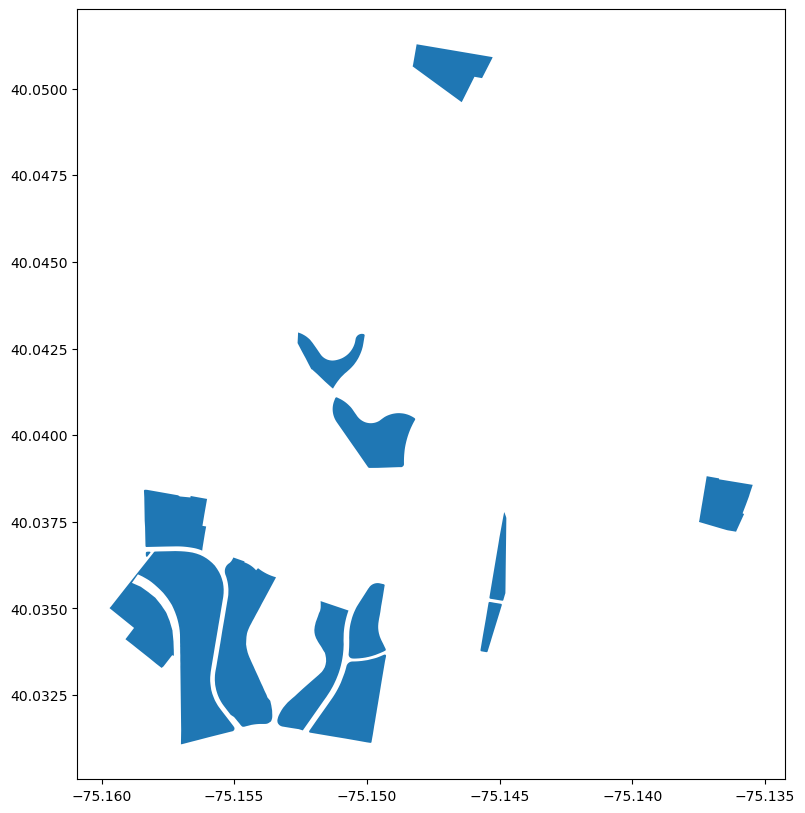

In [27]:
#creating a general plot of parks in 19141
PPR_19141.plot(figsize=(12,10))

<AxesSubplot: >

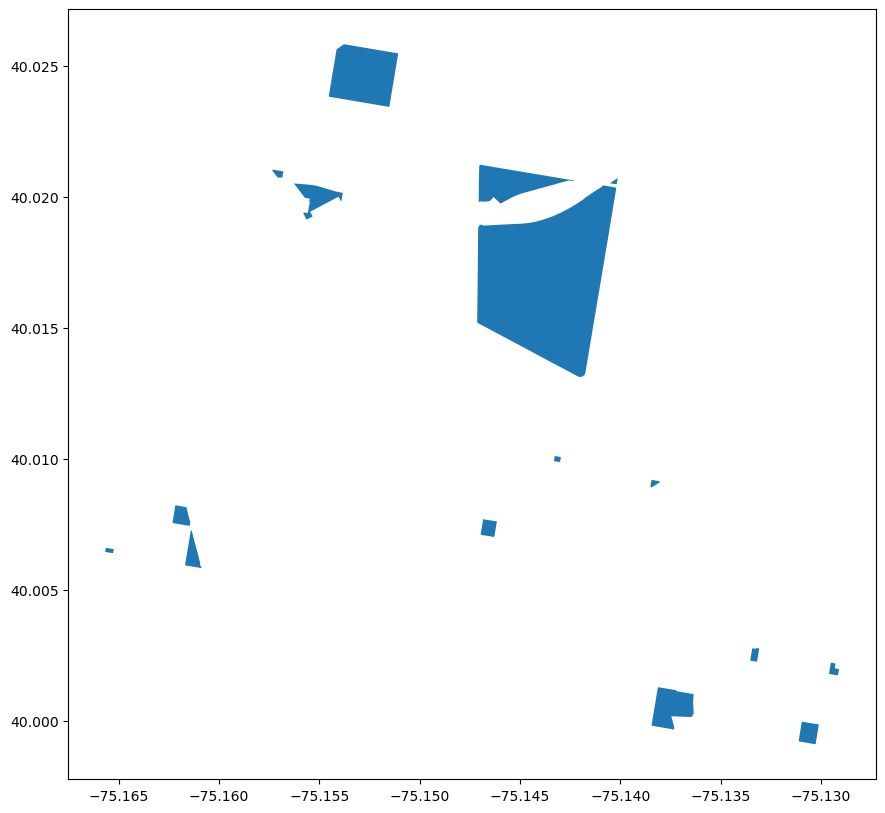

In [28]:
#creating a general plot of parks in 19140
PPR_19140.plot(figsize=(12,10))

In [98]:
#converting int to str
PPR_19140.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 14 entries, 11 to 491
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   PUBLIC_NAME       14 non-null     object  
 1   ZIP_CODE          14 non-null     object  
 2   ACREAGE           14 non-null     object  
 3   COUNCIL_DISTRICT  14 non-null     object  
 4   Shape__Area       14 non-null     int64   
 5   Shape__Length     14 non-null     object  
 6   geometry          14 non-null     geometry
dtypes: geometry(1), int64(1), object(5)
memory usage: 896.0+ bytes


In [99]:
PPR_19140['Shape__Area'] = PPR_19140['Shape__Area'].astype('int')

In [100]:
PPR_19140['Shape__Length'] = PPR_19140['Shape__Length'].astype('str')

In [101]:
#confirming dtypes
PPR_19140.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 14 entries, 11 to 491
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   PUBLIC_NAME       14 non-null     object  
 1   ZIP_CODE          14 non-null     object  
 2   ACREAGE           14 non-null     object  
 3   COUNCIL_DISTRICT  14 non-null     object  
 4   Shape__Area       14 non-null     int64   
 5   Shape__Length     14 non-null     object  
 6   geometry          14 non-null     geometry
dtypes: geometry(1), int64(1), object(5)
memory usage: 896.0+ bytes


In [102]:
PPR_19141['Shape__Area'] = PPR_19141['Shape__Area'].astype('int')

In [103]:
PPR_19141['Shape__Length'] = PPR_19141['Shape__Length'].astype('str')

In [104]:
PPR_19141.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 8 entries, 68 to 279
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   PUBLIC_NAME       8 non-null      object  
 1   ZIP_CODE          8 non-null      object  
 2   ACREAGE           8 non-null      float64 
 3   COUNCIL_DISTRICT  8 non-null      object  
 4   Shape__Area       8 non-null      int64   
 5   Shape__Length     8 non-null      object  
 6   geometry          8 non-null      geometry
dtypes: float64(1), geometry(1), int64(1), object(4)
memory usage: 512.0+ bytes


In [105]:
PPR_19140['ACREAGE'] = PPR_19140['ACREAGE'].astype('int')

In [106]:
PPR_19140['ACREAGE'] = PPR_19140['ACREAGE'].astype('str')

In [108]:
PPR_19140.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 14 entries, 11 to 491
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   PUBLIC_NAME       14 non-null     object  
 1   ZIP_CODE          14 non-null     object  
 2   ACREAGE           14 non-null     object  
 3   COUNCIL_DISTRICT  14 non-null     object  
 4   Shape__Area       14 non-null     int64   
 5   Shape__Length     14 non-null     object  
 6   geometry          14 non-null     geometry
dtypes: geometry(1), int64(1), object(5)
memory usage: 896.0+ bytes


<AxesSubplot: >

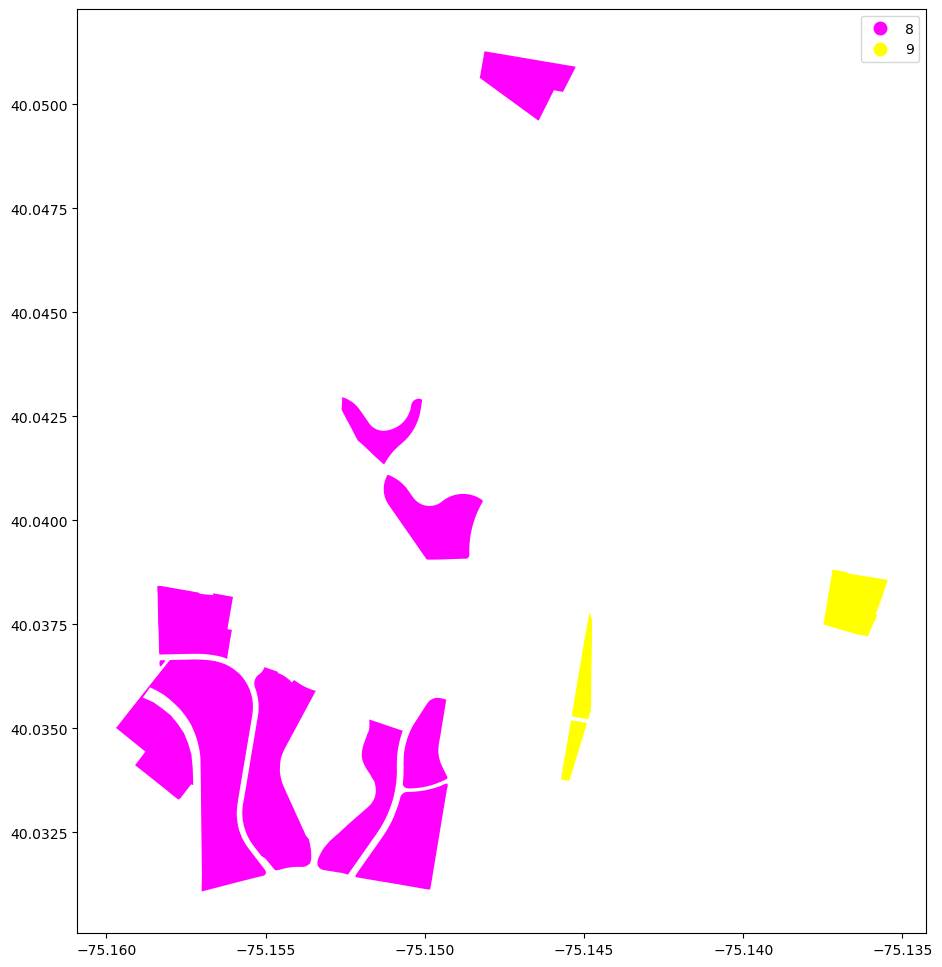

In [109]:
fig,ax = plt.subplots(figsize=(12,12))

PPR_19141.plot(ax=ax,column='COUNCIL_DISTRICT',legend=True,cmap='spring')

<AxesSubplot: >

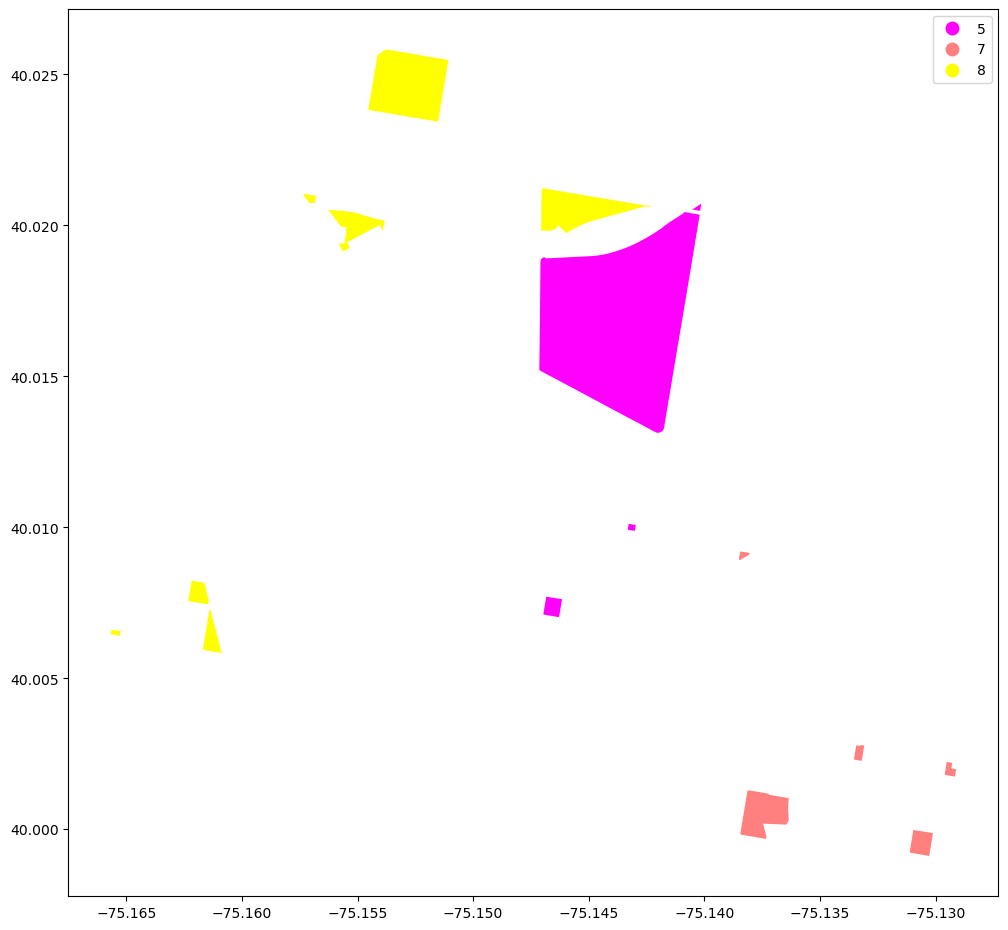

In [110]:
fig,ax = plt.subplots(figsize=(12,12))

PPR_19140.plot(ax=ax,column='COUNCIL_DISTRICT',legend=True,cmap='spring')

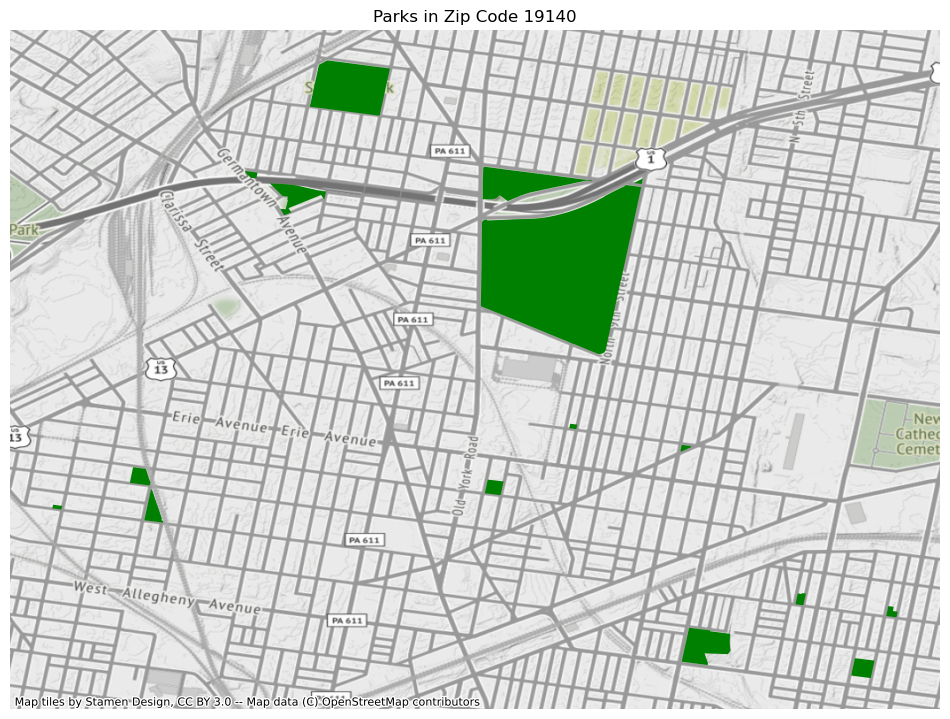

In [111]:
#here's to adding the parks in zip codes 19140 to a basemap
fig, ax = plt.subplots(figsize=(12,12))


PPR_19140.plot(ax=ax,
marker='X',
markersize=20,
color='green')


ax.axis('off')

# add a title
ax.set_title('Parks in Zip Code 19140')

# add basemap
ctx.add_basemap(ax, crs=4326)

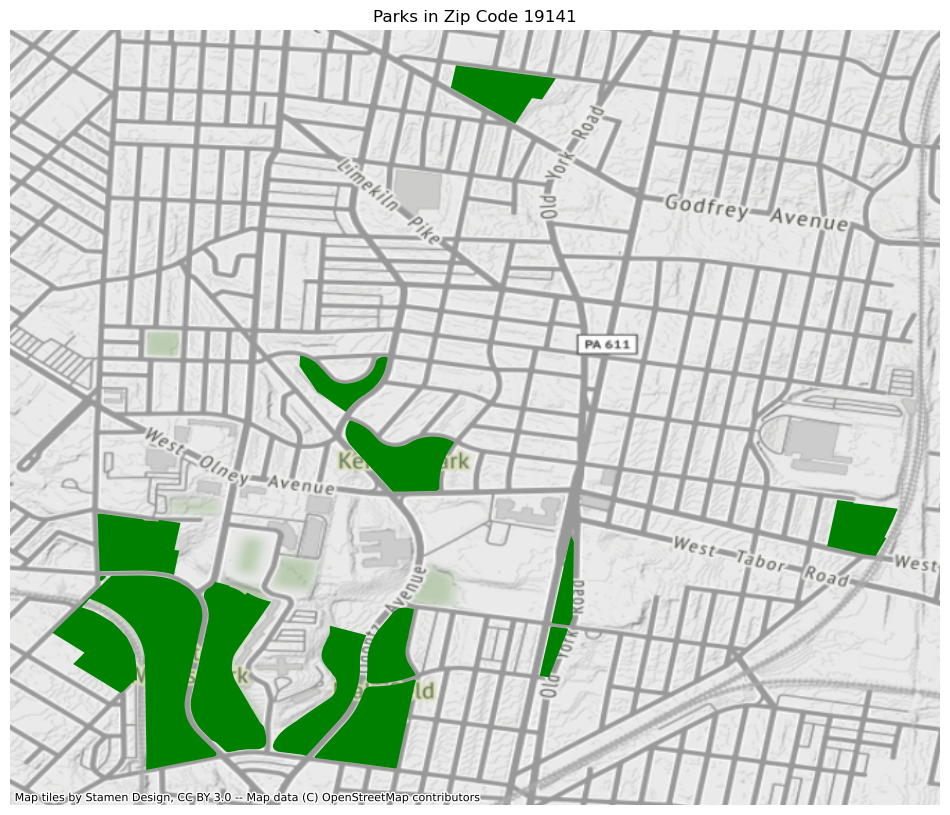

In [117]:
#generating another map for parks in zip code 19141
fig, ax = plt.subplots(figsize=(12,12))


PPR_19141.plot(ax=ax,
marker='X',
markersize=20,
color='green')


ax.axis('off')


ax.set_title('Parks in Zip Code 19141')


ctx.add_basemap(ax, crs=4326)

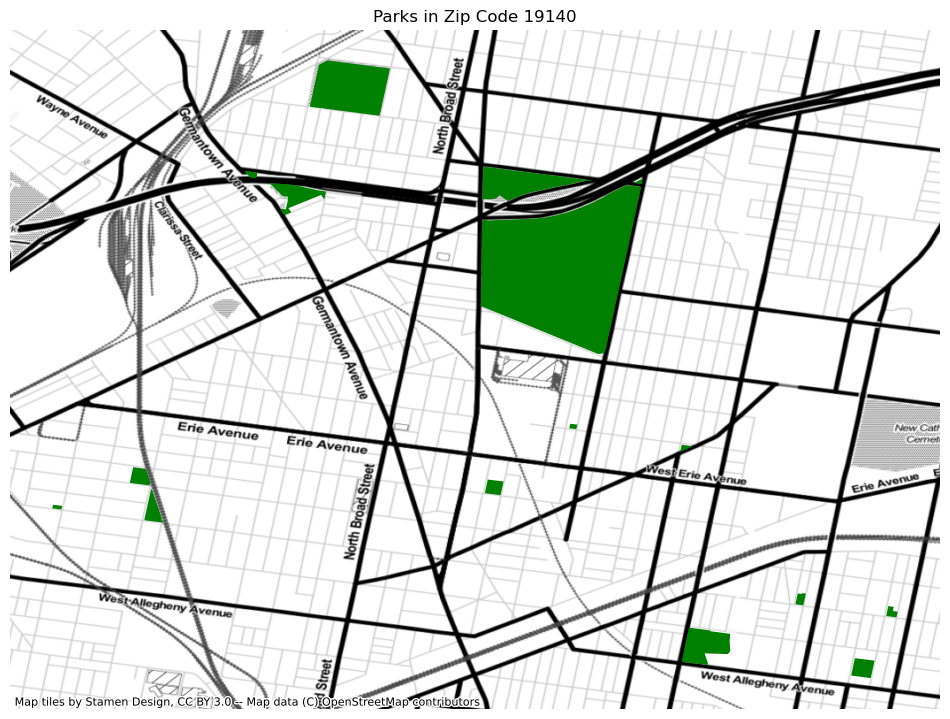

In [115]:
#trying another basemap with zip code 19140
fig, ax = plt.subplots(figsize=(12,12))


PPR_19140.plot(ax=ax,
marker='X',
markersize=20,
color='green')


ax.axis('off')

# add a title
ax.set_title('Parks in Zip Code 19140')

# add basemap, using crs 4326 because it's a GCS 
ctx.add_basemap(ax, source=ctx.providers.Stamen.Toner, crs=4326)

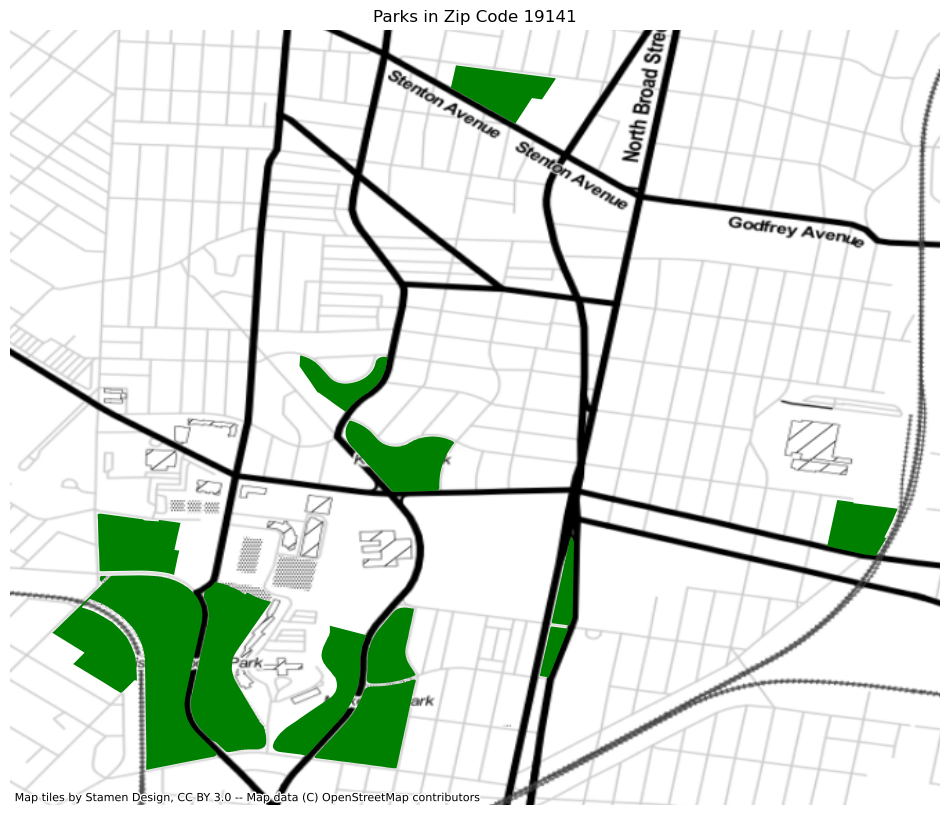

In [116]:
#trying another basemap with zip code 19141
fig, ax = plt.subplots(figsize=(12,12))


PPR_19141.plot(ax=ax,
marker='X',
markersize=20,
color='green')


ax.axis('off')

# add a title
ax.set_title('Parks in Zip Code 19141')

# add basemap, using crs 4326 because it's a GCS 
ctx.add_basemap(ax, source=ctx.providers.Stamen.Toner, crs=4326)

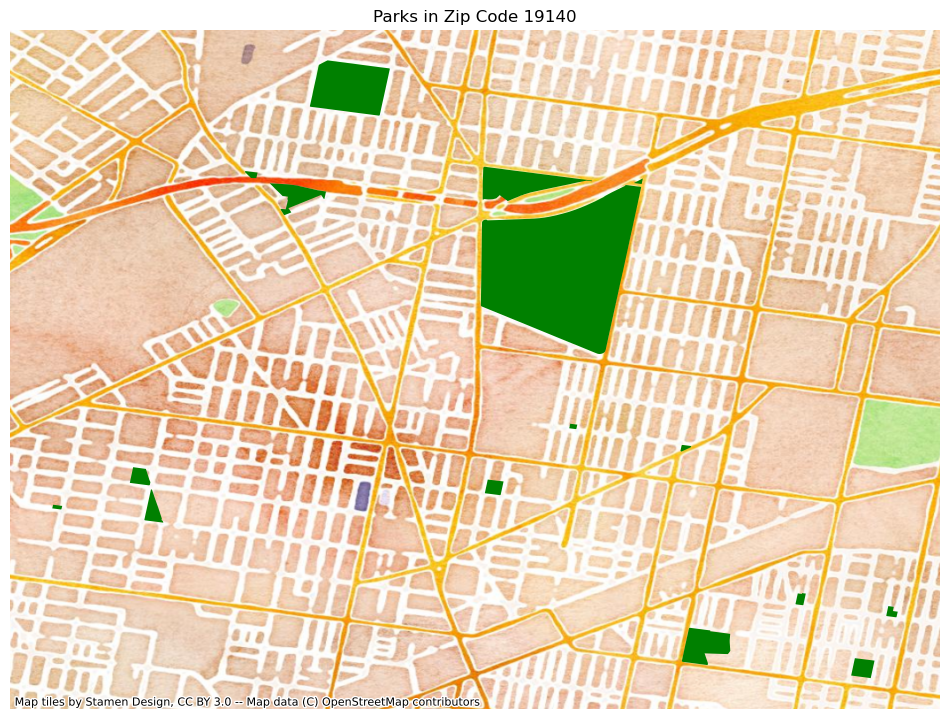

In [118]:
#trying the watercolor basemap with zip code 19140
fig, ax = plt.subplots(figsize=(12,12))


PPR_19140.plot(ax=ax,
marker='X',
markersize=20,
color='green')


ax.axis('off')

# add a title
ax.set_title('Parks in Zip Code 19140')

# add basemap, using crs 4326 because it's a GCS 
ctx.add_basemap(ax, source=ctx.providers.Stamen.Watercolor, crs=4326)

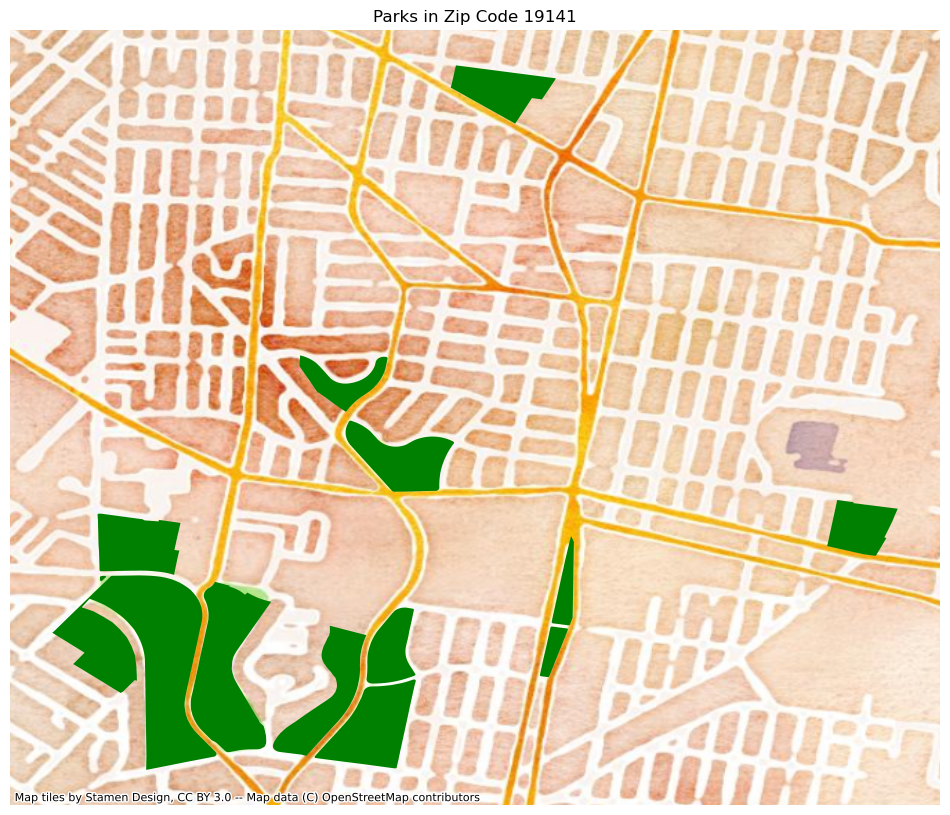

In [119]:
#trying the watercolor basemap with zip code 19141
fig, ax = plt.subplots(figsize=(12,12))


PPR_19141.plot(ax=ax,
marker='X',
markersize=20,
color='green')


ax.axis('off')

# add a title
ax.set_title('Parks in Zip Code 19141')

# add basemap, using crs 4326 because it's a GCS 
ctx.add_basemap(ax, source=ctx.providers.Stamen.Watercolor, crs=4326)